# Airline Passenger Satisfatcion Classification

### This model tries to understand the services of an aviation company through a passenger satisfaction survey

# Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np

# Pandas Set Options

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Upload Datasets

In [ ]:
df_test = pd.read_csv(os.path.join(Path(os.getcwd()).parents[0], 'data', 'test.csv'))
df_train = pd.read_csv(os.path.join(Path(os.getcwd()).parents[0], 'data', 'train.csv'))

In [ ]:
fig, ax = plt.subplots(figsize =(20, 10))

test = ax.bar('test_rows', df_test.shape[0], label='Test')
test_col = ax.bar('test_col', df_test.shape[1], label='Test_col')

train = ax.bar('train_rows', df_train.shape[0], label='Train')
train_col = ax.bar('train_col', df_train.shape[1], label='Train_col')

ax.bar_label(test, label_type='edge')
ax.bar_label(train, label_type='edge')

ax.bar_label(test_col, label_type='edge')
ax.bar_label(train_col, label_type='edge')
plt.ylim(0, 150000)
plt.legend()

plt.show()

## 1.1 Concatenating the Datasets

In [ ]:
df_concat = pd.concat([df_train, df_test]).reset_index()

In [ ]:
df_concat.shape

## 1.2 Renaming columns

In [ ]:
df_rename = df_concat.copy()

In [ ]:
df_concat.info()

In [ ]:
df_rename.columns

In [ ]:
new_columns = [
    new_name.replace(' ', '_').lower()
    for new_name in df_rename.columns
    ]

In [ ]:
df_rename.columns = new_columns

### 1.2.1 Initial data cleaning

In [ ]:
len(df_rename['id'].unique())

In [ ]:
drop_cols = ['index', 'unnamed:_0', 'id']
df_rename.drop(drop_cols, axis = 1, inplace = True)

#### A: There's no duplicate ids. So, there's no reason to maintain this attribute

# 2. Data exploratory analysis

In [ ]:
df_exploratory = df_rename.copy()

#### Q.1: Is any null value?

In [ ]:
df_exploratory.columns[df_exploratory.isnull().any()]

In [ ]:
df_exploratory.isnull().sum()

#### A.1: Only one attribute have 393 null objects. That represents 0.3% of the data.

In [ ]:
# Descriptive Data Analysis
df_exploratory.info()

In [ ]:
# Count of dtypes
df_exploratory.dtypes.value_counts()

In [ ]:
# A small sample
df_exploratory.sample(n = 5, random_state = 42)

In [ ]:
# Memory usage
print(df_exploratory.memory_usage()[2] / 8, 'Bytes')

In [ ]:
# Some statistical numbers
df_exploratory.describe(include = 'all').T

In [ ]:
# Dimensions
df_exploratory.ndim

#### Age distribution

In [ ]:
hist, ax = plt.subplots(figsize = (12, 8))

ax = sns.distplot(df_exploratory['age'], kde = True, color = 'black', norm_hist = True)
ax.set_title("Age Distribution")
plt.show()

#### Q.2: What is the proportion of male and female for Loyal Customer?

In [ ]:
# Total of each gender
n_male = df_exploratory[df_exploratory['gender'] == 'Male'].count()[0]
n_female = df_exploratory[df_exploratory['gender'] == 'Female'].count()[0]

# Total of each gender for Loyal Customer
n_male_loyal = df_exploratory[(df_exploratory['gender'] == 'Male') & (df_exploratory['customer_type'] == 'Loyal Customer')].count()[0]
n_female_loyal = df_exploratory[(df_exploratory['gender'] == 'Female') & (df_exploratory['customer_type'] == 'Loyal Customer')].count()[0]

In [ ]:
# Proportion of female that are loyal customers
proportion_fem = n_female_loyal / n_female * 100

# # Proportion of male that are loyal customers
proportion_male = n_male_loyal / n_male * 100

print(f'Loyal customers proportion: \n MALE: {proportion_male:.2f}% \n FEMALE: {proportion_fem:.2f}%')

#### A.2: Loyal customers proportion: 
        MALE: 82.91%
        FEMALE: 80.51%

#### Q.3: From the proportion of Loyal Customers what is the proportion of male and female that flew in Business class?

In [ ]:
# Proportion of male that flew in the business class
n_male_loyal_business = df_exploratory[(df_exploratory['gender'] == 'Male')
                            & (df_exploratory['customer_type'] == 'Loyal Customer')
                            & (df_exploratory['class'] == 'Business')].count()[0]

# Proportion of female that flew in the business class
n_female_loyal_business = df_exploratory[(df_exploratory['gender'] == 'Female')
                            & (df_exploratory['customer_type'] == 'Loyal Customer')
                            & (df_exploratory['class'] == 'Business')].count()[0]

In [ ]:
# Proportion of female that flew in the business class
proportion_fem_class = n_female_loyal_business / n_female_loyal * 100

# Proportion of male that flew in the business class
proportion_mal_class = n_male_loyal_business / n_male_loyal * 100

print(f'Loyal customers that flew in the business class proportion: \n MALE: {proportion_mal_class:.2f}% \n FEMALE: {proportion_fem_class:.2f}%')

#### A.3: Loyal customers that flew in the business class proportion: 
        MALE: 49.84% 
        FEMALE: 49.94%

#### Q.4: What is the proportion of customers that evaluated the company with an overall under 30 points?

In [ ]:

points_customer_satis = df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']][(df_exploratory.iloc[ : , 6 : -3].sum(axis = 1) <= 30) & (df_exploratory['satisfaction'] == 'satisfied')].count()[0]             
points_customer_neut = df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']][(df_exploratory.iloc[ : , 6 : -3].sum(axis = 1) <= 30) & (df_exploratory['satisfaction'] == 'neutral or dissatisfied')].count()[0]

print(f'Only {points_customer_satis / points_customer_neut *100:.2f}% of the passengers who rated the company below 30 points classified with "satisfied"')

#### A.4: Only 15.05% of passengers who rated the company below 30 points classified it as "satisfied"


In [ ]:
df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']] \
              [(df_exploratory.iloc[ : , 6 : -3]
              .sum(axis = 1) <= 15) & (df_exploratory['satisfaction'])]

#### Only two customers (loyal customers) that the overall points was less than 15 and yet classified with "satisfied"

In [ ]:
df_exploratory[['gender', 'customer_type', 'age', 'type_of_travel', 'class', 'satisfaction']] \
              [(df_exploratory.iloc[ : , 6 : -3]
              .sum(axis = 1) < 30) & (df_exploratory['satisfaction'] == 'neutral or dissatisfied')].count()

In [ ]:
null_satis = df_exploratory[(df_exploratory['arrival_delay_in_minutes'].isnull()) & (df_exploratory['satisfaction'] == 'satisfied')].count()[0]
null_total = df_exploratory[df_exploratory['arrival_delay_in_minutes'].isnull()].count()[0]

print(f'From null values the proportion of customers that classified with "satisfied" is: \n {null_satis / null_total * 100:.2f}%')

#### From null values the proportion of customers that classified with "satisfied" is: 
        42.24%

In [ ]:
# Descriptive analysis
df_exploratory.groupby(['age', 'customer_type', 'class'])['satisfaction'].value_counts()

Disloyal customers with age 31, 34, 53, 73, 74, 75 and 78 has no "satisfied" classifications

In [ ]:
df_exploratory['age'].value_counts(sort = True, ascending = False)

In [ ]:
plt.figure(figsize=(15, 10))
df_exploratory['age'].value_counts(normalize = True).plot(kind = 'bar')

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data = df_exploratory,
                x = df_exploratory.age,
                y = df_exploratory.age.value_counts(),
                size = df_exploratory.age.value_counts(),
                alpha = 0.5,
                sizes=(20, 800),
                hue = 'satisfaction',
                )
plt.ylabel('Persons')
plt.show()

In [ ]:
df_exploratory[(df_exploratory['age'] <= 18) & (df_exploratory['satisfaction'] == 'satisfied')].count()[0]

In [ ]:
df_exploratory[(df_exploratory['age'] <= 18) & (df_exploratory['satisfaction'] != 'satisfied')].count()[0]

In [ ]:
for atr in df_exploratory.columns:
    if df_exploratory[atr].dtype == "object":
        plt.figure(figsize=(10, 5))
        df_exploratory[atr].hist(bins = 5, grid = False, )
        plt.xlabel(atr)
        plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = df_exploratory, x = 'class', y = 'age', hue = 'satisfaction')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = df_exploratory,
                x = 'departure_delay_in_minutes',
                y = 'arrival_delay_in_minutes',
                hue = 'satisfaction',
                style = 'satisfaction')

This research has a metric of 0 to 5 for each one of the 15 attributes. Wich means the maximum result for each passenger is 75 points

In [ ]:
df_exploratory['max_points'] = df_exploratory.iloc[ : , 6 : -4].sum(axis = 1)
print('Max = ', df_exploratory['max_points'].max(), '\nMin = ', df_exploratory['max_points'].min())

In [ ]:
df_exploratory[df_exploratory['max_points'] >= 70]

In [ ]:
df_exploratory[df_exploratory['max_points'] <= 15]

In [ ]:
df_exploratory.groupby(['gender', 'customer_type', 'class'])['satisfaction'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize = (20, 10))

X = df_exploratory[df_exploratory['customer_type'] == 'Loyal Customer'].count()
y = df_exploratory[(df_exploratory['customer_type'] == 'Loyal Customer') &
    (df_exploratory['satisfaction'] == 'satisfied')].count()

customer = ax.bar('customer_type', X, label='Loyal Customer')
satisfaction = ax.bar('satisfaction', y, label='satisfied')

ax.bar_label(customer, label_type='edge')
ax.bar_label(satisfaction, label_type='edge')

plt.ylim(0, 150000)
plt.legend()

plt.show()


In [ ]:
df_exploratory.describe()

In [ ]:
df_concat.plot(kind = 'scatter', x = 'Age', y = 'Food and drink', s = 'Age')

In [ ]:
df_concat.hist(bins=50, figsize=(20, 15))
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = df_concat, x = 'Age', y = 'Customer Type')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(data = df_concat['Flight Distance'])
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
df_concat['Age'].hist()
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df_exploratory,  x='departure_delay_in_minutes', y='arrival_delay_in_minutes', hue='satisfaction', style='satisfaction')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_exploratory.corr(), annot=True, center = 0.01, robust = True, linecolor = 'black', alpha = 0.9)
plt.show()

# 3. Dropping some categorical attributes

In [ ]:
df_drop = df_exploratory.copy()

In [ ]:
df_drop.head()

In [ ]:
df_drop.drop(columns = 
    [   
        'gender',
        'age',
        'type_of_travel',
        'flight_distance',
        'departure_delay_in_minutes',
        'arrival_delay_in_minutes',
        'max_points'
    ]
    , inplace = True
)

In [185]:
df_drop.loc[3]

customer_type                                 Loyal Customer
class                                               Business
inflight_wifi_service                                      2
departure/arrival_time_convenient                          5
ease_of_online_booking                                     5
gate_location                                              5
food_and_drink                                             2
online_boarding                                            2
seat_comfort                                               2
inflight_entertainment                                     2
on-board_service                                           2
leg_room_service                                           5
baggage_handling                                           3
checkin_service                                            1
inflight_service                                           4
cleanliness                                                2
satisfaction            

# 4. Encoding Categorical Data

In [165]:
df_encoder = df_drop.copy()

In [166]:
from sklearn.preprocessing import LabelEncoder

In [167]:
encoding_cols = df_encoder.select_dtypes(include='object').columns
encoding_cols

Index(['customer_type', 'class', 'satisfaction'], dtype='object')

In [168]:
df_encoder['class'] = df_encoder.iloc[:, 1].apply(lambda cl: cl.replace(' ', '_'))
df_encoder.iloc[:, 1].unique()

array(['Eco_Plus', 'Business', 'Eco'], dtype=object)

In [169]:
le = LabelEncoder()
df_encoder['customer_type'] = le.fit_transform(df_encoder['customer_type'])
df_encoder['satisfaction'] = le.fit_transform(df_encoder['satisfaction'])
df_encoder['class'] = le.fit_transform(df_encoder['class'])

#### CLASS >> 0 = Business; 1 = Eco; 2 = Eco_Plus
#### CUSTOMER TYPE >> 0 = Loyal Customer; 1 = Disloyal Customer
#### SATISFACTION >> 0 = Neutral or Dissatisfied; 1 = Satisfied

In [170]:
df_encoder.head()

,customer_type,class,inflight_wifi_service,departure/arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on-board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,0,2,3,4,3,1,5,3,5,5,4,3,4,4,5,5,0
1,1,0,3,2,3,3,1,3,1,1,1,5,3,1,4,1,0
2,0,0,2,2,2,2,5,5,5,5,4,3,4,4,4,5,1
3,0,0,2,5,5,5,2,2,2,2,2,5,3,1,4,2,0
4,0,0,3,3,3,3,4,5,5,3,3,4,4,3,3,3,1


# 5. Train & Test Split

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
df_split = df_encoder.copy()

In [188]:
X = df_split.iloc[:, :-1].values
y = df_split.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# 6. Data Reduction

In [190]:
from sklearn.model_selection import StratifiedShuffleSplit

In [191]:
sss = StratifiedShuffleSplit(n_splits=1, train_size=0.05, random_state=0)
sss.get_n_splits(X_train, y_train)

X = X_train
y = y_train

for train_index, test_index in sss.split(X, y):
    X_new_train = X[train_index]
    y_new_train = y[train_index]

In [192]:
X_new_train.shape, y_new_train.shape

((5195, 16), (5195,))

# 7. The model: MLP Classifier

In [193]:
import pprint
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [194]:
parameters={
    'learning_rate': ["constant", "invscaling", "adaptive"], 
    'hidden_layer_sizes': [(10,), (10, 5)],
    'alpha': [0.0001, 0.001, 0.00001],
    'activation': ["logistic", "relu", "tanh"],
    'learning_rate_init': [0.001, 0.0001, 0.00001]    
            }

mlp = MLPClassifier()

clf = GridSearchCV(estimator=mlp, param_grid=parameters, n_jobs=-1, verbose=3, cv=10)
clf.fit(X_new_train, y_new_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


C:\Users\viniciushc\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['logistic', 'relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 1e-05],
                         'hidden_layer_sizes': [(10,), (10, 5)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'learning_rate_init': [0.001, 0.0001, 1e-05]},
             verbose=3)

In [195]:
clf.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (10, 5),
 'learning_rate': 'invscaling',
 'learning_rate_init': 0.001}

In [196]:
mlp = MLPClassifier(activation='logistic', alpha=0.001, hidden_layer_sizes=(10, 5), learning_rate='adaptive', max_iter = 10000, verbose = 3, early_stopping = True)
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.60329292
Validation score: 0.824848
Iteration 2, loss = 0.43262637
Validation score: 0.842556
Iteration 3, loss = 0.39449874
Validation score: 0.849389
Iteration 4, loss = 0.38412768
Validation score: 0.851410
Iteration 5, loss = 0.37834030
Validation score: 0.853431
Iteration 6, loss = 0.37270954
Validation score: 0.854297
Iteration 7, loss = 0.36817537
Validation score: 0.856222
Iteration 8, loss = 0.36315894
Validation score: 0.856510
Iteration 9, loss = 0.35567738
Validation score: 0.862285
Iteration 10, loss = 0.33879818
Validation score: 0.868925
Iteration 11, loss = 0.32269318
Validation score: 0.875373
Iteration 12, loss = 0.30606556
Validation score: 0.881821
Iteration 13, loss = 0.28915403
Validation score: 0.888557
Iteration 14, loss = 0.27351998
Validation score: 0.889712
Iteration 15, loss = 0.26129882
Validation score: 0.894332
Iteration 16, loss = 0.25101773
Validation score: 0.892214
Iteration 17, loss = 0.24245555
Validation score: 0.897700
Iterat

MLPClassifier(activation='logistic', alpha=0.001, early_stopping=True,
              hidden_layer_sizes=(10, 5), learning_rate='adaptive',
              max_iter=10000, verbose=3)

In [197]:
pred_mlp = mlp.predict(X_test)
pred_mlp

array([0, 1, 0, ..., 1, 1, 0])

In [198]:
conf_matrix = confusion_matrix(y_test, pred_mlp)
acc_score = accuracy_score(y_test, pred_mlp)
conf_matrix, acc_score

(array([[13912,   710],
        [ 1037, 10317]], dtype=int64),
 0.9327456113335386)

In [199]:
class_repo = classification_report(y_test, pred_mlp)
pprint.pprint(class_repo)

('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.93      0.95      0.94     14622\n'
 '           1       0.94      0.91      0.92     11354\n'
 '\n'
 '    accuracy                           0.93     25976\n'
 '   macro avg       0.93      0.93      0.93     25976\n'
 'weighted avg       0.93      0.93      0.93     25976\n')


In [200]:
prob = mlp.predict_proba(X_test)
prob = prob[:, 1]
fper, tper, thresholds = roc_curve(y_test, prob)

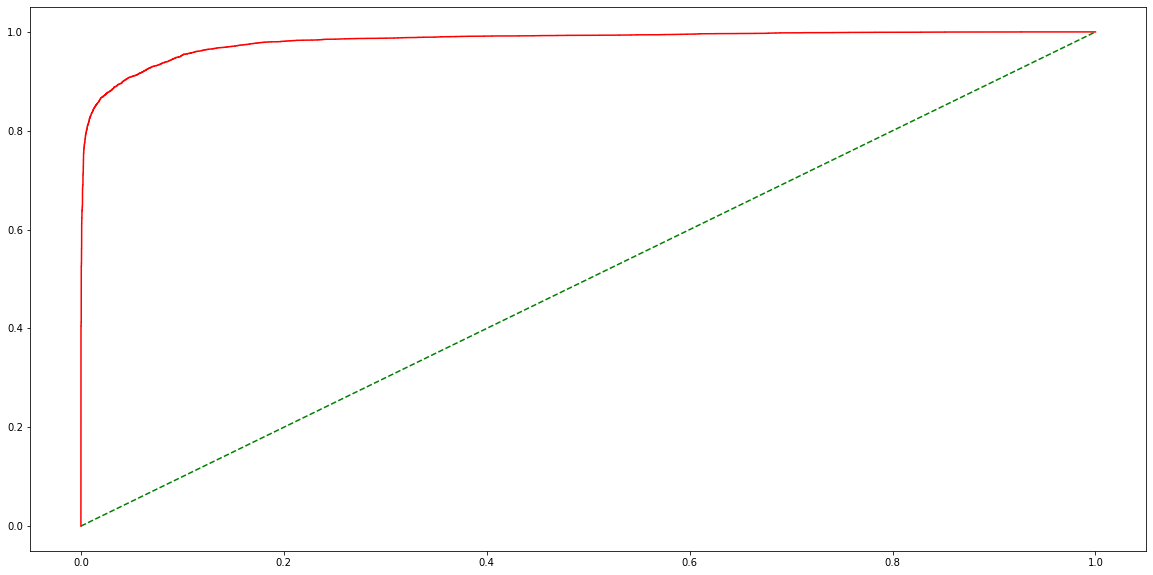

In [202]:
plt.figure(figsize=(20, 10))
plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()